In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.00

In [3]:
ldata = pd.read_csv("letterdata.csv")
ldata.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
X,y = np.array(ldata)[:,1:16], np.array(ldata.letter)[:]

In [5]:
X_train = X[:16000,:]
X_test = X[16001:,:]
y_train = y[:16000]
y_test = y[16001:]

In [6]:
model = svm.SVC(gamma=0.25, C=3)

In [7]:
model.fit(X_train, y_train)

SVC(C=3, gamma=0.25)

In [8]:
y_pred = model.predict(X_test)

In [10]:
getAccuracy(y_test, y_pred)

94.0735183795949

In [11]:
y_grid =(np.column_stack([y_test, y_pred]))
print(y_grid)

[['N' 'N']
 ['V' 'V']
 ['I' 'I']
 ...
 ['T' 'T']
 ['S' 'S']
 ['A' 'A']]


In [12]:
import string
lab = list(string.ascii_uppercase[0:26])
plab = ["Pr "+s for s in lab]

<AxesSubplot:>

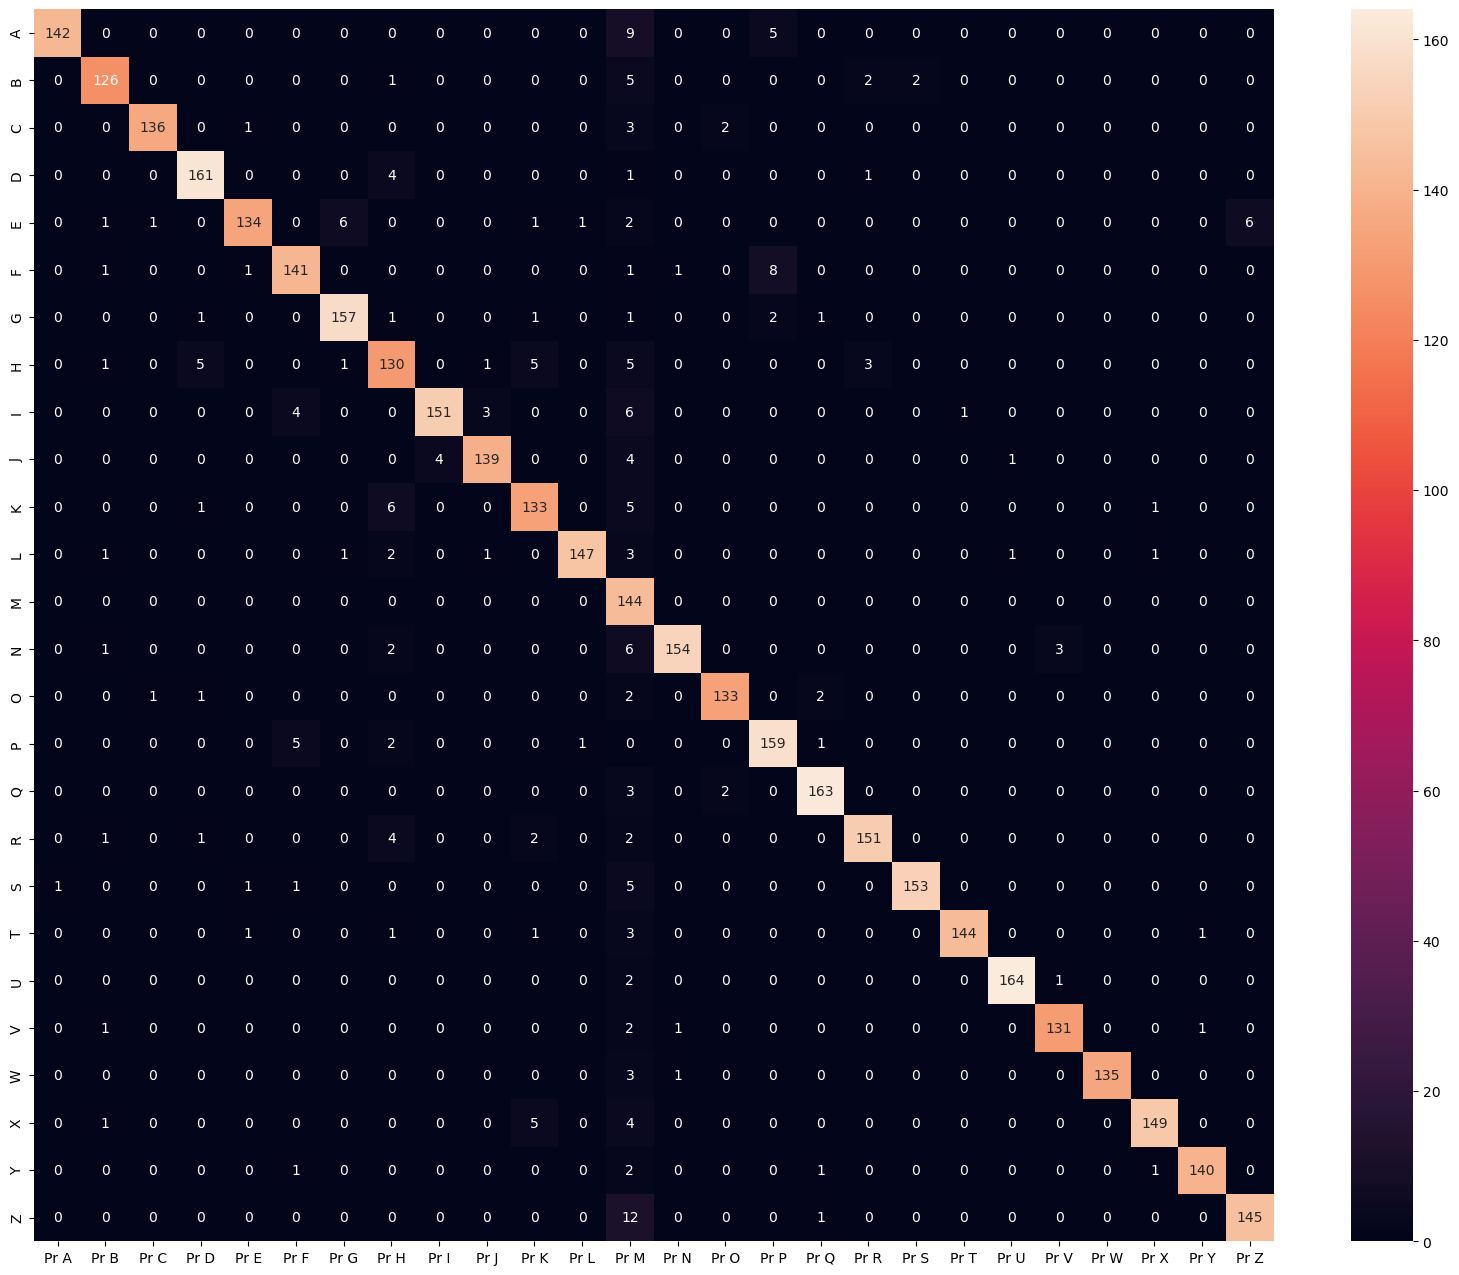

In [13]:
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred, labels=lab)
cm_df = pd.DataFrame(cm, index = [i for i in lab], columns = [i for i in plab])
plt.figure(figsize=(20,16))
sns.heatmap(cm_df, annot=True, fmt='g')